In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Gráfico dos valores do acelerômetro

In [38]:
log = open('log_acele.txt', 'r')
x = np.array([])
y = np.array([])
z = np.array([])

for linha in log:
    x = np.append(x, int(linha[4:7]))
    y = np.append(y, int(linha[12:15]))
    z = np.append(z, int(linha[20:23]))
    
z

array([512., 510., 512., 506., 509., 507., 507., 509., 509., 510., 509.,
       510., 506., 495., 488., 490., 489., 479., 475., 469., 460., 458.,
       452., 449., 446., 445., 441., 446., 437., 443., 442., 440., 442.,
       444., 445., 446., 446., 448., 448., 448., 448., 448., 447., 453.])

NameError: name 'y' is not defined

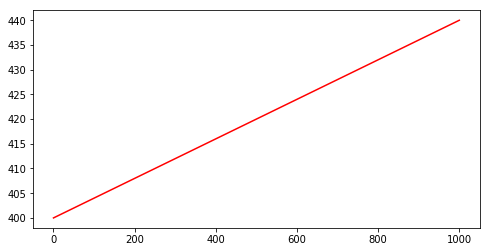

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

xg = np.linspace(0, len(x), len(x))

plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['lines.color'] = ('r')

plt.plot(xg, x, color='r', label='x')
plt.plot(xg, y, color='g', label='y')
plt.plot(xg, z, color='b', label='z')

plt.legend(loc='best', fontsize=11)
plt.xlim(0, len(x))
plt.grid()
plt.show()

## Testes Fuzzy

In [33]:
def trimf(x, a, b, c):
    return np.array([trim(xi, a, b, c) for xi in x])

def trim(x, a, b, c):
    min1 = (x - a) / (b - a)
    min2 = (c - x) / (c - b)
    return max(min([min1, min2]), 0)

def trampf(x, a, b, c, d):
    return [tramp(xi, a, b, c, d) for xi in x]

def tramp(x, a, b, c, d):
    min1 = (x - a) / (b - a)
    min2 = 1
    min3 = (d - x) / (d - c)
    return max(min([min1, min2, min3]), 0)

trimf([10, 1], 0., 20., 40.)
trampf(np.array([2, 3]), 1., 4., 7., 10.)

[0.3333333333333333, 0.6666666666666666]

In [52]:
def cPostAdequada(x):
    return trampf(x, 0, 404, 414, 419)

def cPostMMAdequada(x):
    return trimf(x, 413, 422, 430)
    
def cPostInadequada(x):
    return trampf(x, 423, 430, 440, 445)

def inferir(x):
    return cPostAdequada(x), cPostMMAdequada(x), cPostInadequada(x)


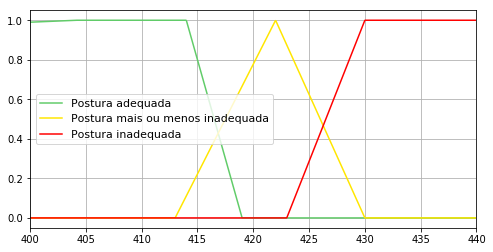

<Figure size 576x288 with 0 Axes>

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

x = np.linspace(400, 440, 1000)

plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['lines.color'] = ('r')

plt.plot(x, cPostAdequada(x), color=(.38, .8, .41, 1), label='Postura adequada')
plt.plot(x, cPostMMAdequada(x), color=(1, .9, 0, 1), label='Postura mais ou menos inadequada')
plt.plot(x, cPostInadequada(x), color='r', label='Postura inadequada')

plt.legend(loc='best', fontsize=11)
plt.xlim(400, 440)
plt.grid()
plt.show()

plt.savefig("fuzzy_postura.png")